In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
import matplotlib.pyplot as plt

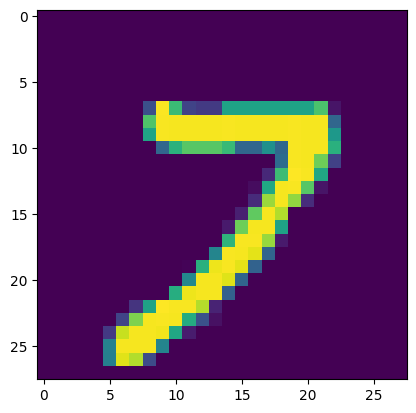

In [6]:
plt.imshow(df.iloc[13092 , 1:].values.reshape(28, 28))

In [7]:
X = df.iloc[: , 1 :]
y = df.iloc[:, 0]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(33600, 784)

# Without applying PCA

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
import time
start = time.time()

y_pred = knn.predict(X_test)
print(time.time() - start)

12.424761533737183


In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9648809523809524

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying PCA

In [18]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=100)

In [19]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [20]:
X_train_trf.shape

(33600, 100)

In [21]:
knn = KNeighborsClassifier()

knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [22]:
y_pred2 = knn.predict(X_test_trf)

In [23]:
accuracy_score(y_test, y_pred2)

0.9547619047619048

## Trying out different `n_components` values and comparing their `accuracy_score`

In [ ]:
for i in range(1, 785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)

    y_pred2 = knn.predict(X_test_trf)
    print(accuracy_score(y_test, y_pred2))

# Visualising in 2D

In [27]:
# taansform to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [29]:
X_train_trf.shape

(33600, 2)

In [31]:
import plotly.express as px

y_train_trf = y_train.astype(str)
fig = px.scatter(x = X_train_trf[:, 0],
                y = X_train_trf[:, 1],
                color = y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10
                )

fig.show()

# Visualising in 3D

In [32]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [33]:
X_train_trf.shape

(33600, 3)

In [36]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x = X_train_trf[:, 0],
                y = X_train_trf[:, 1],
                z = X_train_trf[:, 2],
                color = y_train_trf
                )
fig.update_layout(
    margin = dict(l=20, r=20, t=20, b=20)
)

fig.show()

In [37]:
# Eigen Values
pca.explained_variance_

array([40.67111197, 29.17023392, 26.74459544])

In [39]:
# Eigen Vectors
pca.components_.shape

(3, 784)

In [49]:
# percentage contri of each eigen value in Data Variance
pca.explained_variance_ratio_ * 100

array([5.78519225e+00, 4.14926968e+00, 3.80423901e+00, 2.96626277e+00,
       2.58156168e+00, 2.25498018e+00, 1.97306802e+00, 1.77527998e+00,
       1.56865066e+00, 1.43606328e+00, 1.37025484e+00, 1.22725500e+00,
       1.14691200e+00, 1.12302739e+00, 1.05852885e+00, 1.01993106e+00,
       9.57676152e-01, 9.42708817e-01, 9.12489429e-01, 8.90170190e-01,
       8.39940495e-01, 8.20063196e-01, 7.85303229e-01, 7.56739707e-01,
       7.37261022e-01, 7.01884653e-01, 6.97919728e-01, 6.71104483e-01,
       6.39845030e-01, 6.30337291e-01, 6.15350848e-01, 6.02388659e-01,
       5.83673972e-01, 5.78547759e-01, 5.72333148e-01, 5.46399774e-01,
       5.43207369e-01, 5.28172755e-01, 5.13381744e-01, 4.94015474e-01,
       4.87671103e-01, 4.81978768e-01, 4.68204430e-01, 4.59342487e-01,
       4.57660834e-01, 4.49219022e-01, 4.44682221e-01, 4.41540749e-01,
       4.35111936e-01, 4.32032928e-01, 4.21808870e-01, 4.18243127e-01,
       4.07994349e-01, 4.02004913e-01, 3.98335855e-01, 3.94598812e-01,
      

In [45]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

### Understanding the %age contribution of Eigen Values

In [47]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

---
# Choosing Optimum Number of Principal Components

---

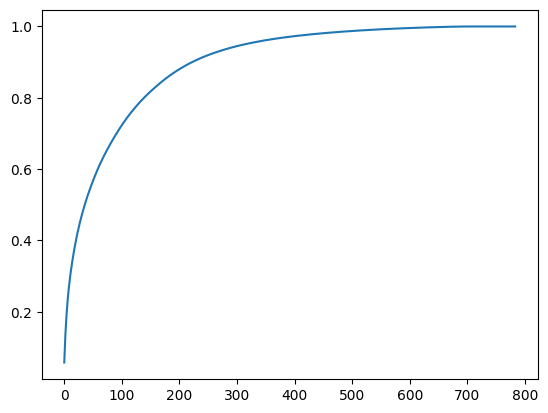

In [48]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

> 200 (approx.) will be the optimal number of Principal Components